# An introduction to visualisation in Python

Data visualization is displaying quantitative and qualitative information, so that a viewer can see
patterns, trends, oddities, correlations, constancy, and variation, in ways that other forms (text and table) may not allow. Plotting parts of data can be an important step in descriptive and exploratory analyses. Here we introduce two main plotting libraries in Python: _matplotlib_ and _seaborn_. 

Note that the EFI has a full course on visualisation named [Representing Data](http://www.drps.ed.ac.uk/23-24/dpt/cxefie11002.htm) in which you can learn about data visualisation theory and practice. 

## matplotlib library

[Matplotlib](https://matplotlib.org/stable/index.html) is a visualization  library/module/package in Python for 2D plots. It allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib can produce several plots like line, bar, scatter, histogram etc.

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

# import other packages we may need
import pandas as pd
import numpy as np

The default plot in matplotlib is a line plot made by the function `plot`.

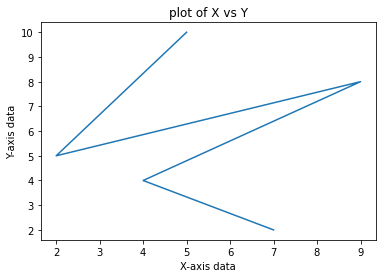

In [2]:
# X-axis values
x = [5, 2, 9, 4, 7]

# Y-axis values
y = [10, 5, 8, 4, 2]

# function to plot
plt.plot(x,y)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('plot of X vs Y')

# function to show the plot
plt.show()

Make several adjustments to how the plot is displayed:

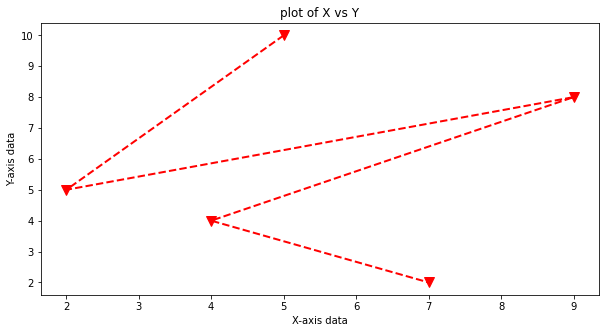

In [51]:
# X-axis values
x = [5, 2, 9, 4, 7]

# Y-axis values
y = [10, 5, 8, 4, 2]

# change the size of the figure- has to be called before the plot function
plt.figure(figsize=(10,5))

# function to plot
plt.plot(x, y, marker='v', markersize= 10, color='r', linestyle='--', linewidth = 2)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('plot of X vs Y')

# function to show the plot
plt.show()

When you need to learn more about a function and its specifications, you can search it online or try Python's help, by running this command "?functionname". For example, uncomment and run the command below to see Python's help description about `plt.plot`.

In [4]:
#?plt.plot

Some other types of plots in matplolib are `plt.scatter`, `plt.bar`, `plt.hist`, `plt.pie` that fit different types of data. 

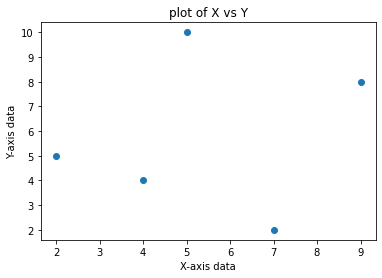

In [5]:
# X-axis values
x = [5, 2, 9, 4, 7]

# Y-axis values
y = [10, 5, 8, 4, 2]

# function to plot- also change it to plt.bar(x, y) to make a bar plot
plt.scatter(x, y)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('plot of X vs Y')

# function to show the plot
plt.show()

A histogram is a graph used to represent the frequency distribution of data points of one variable. Histograms often classify data into various “bins” or “range groups” and count how many data points belong to each of those bins.

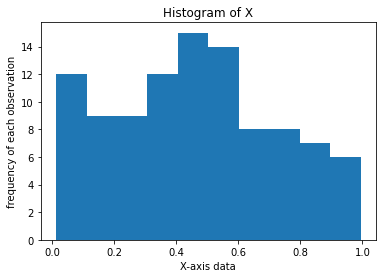

In [6]:
# X-axis values- generate 100 random numbers between (0,1) and save them in x
from numpy import random
random.seed(seed=2) # to generate the same random numbers in every run
x=random.rand(100)

# function to plot- by default this histogram has 10 bins 
plt.hist(x)
# also try the line below instead, with bins and see how the blocks change
#plt.hist(x, bins = [0, 0.25, 0.50, 0.75, 1])
#or
#plt.hist(x, bins = 4)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("frequency of each observation")
plt.title('Histogram of X')

# function to show the plot
plt.show()

# How many observations are between 0-0.1?
# How many observations are between 0-0.25?

It is not difficult to make more complicated plots with `matplotlib`. However, we are going to move on to learn about another visualisation library which provides a better structured way to plot data.

## seaborn library

[Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) is a library/module/package for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn has a nice structure which makes plotting easier using three types of `relplot`, `displot`, and `catplot` (“relational”, “distributional”, and “categorical” plots). 

The general command is: 

`sns.---plot(data=---, x="---", kind="---")`

and you can add appropriate  optional elements to it:

`sns.---plot(data=---, x="---", y="---", kind="--", hue="---", multiple="---", col/row="---", style="---", size="---", ...)`

You can also check seaborn's [Gallary](https://seaborn.pydata.org/examples/index.html) and choose the plot you need, copy the code and try to reproduce it for your data.


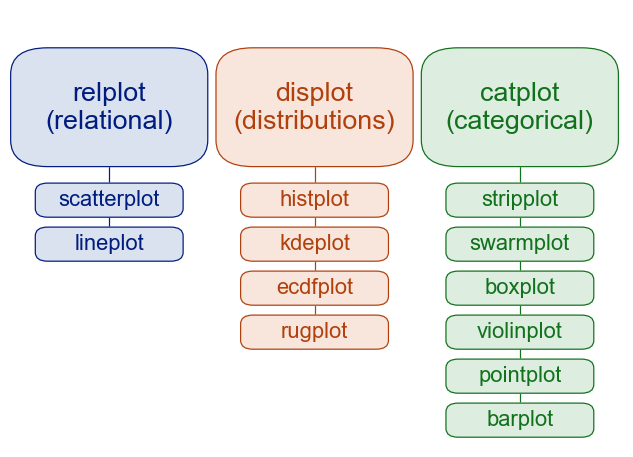

Here we make a few visualisations using Seaborn for the `kc_house_data.csv` data. 

We need to import the seaborn library first:


In [7]:
# import seaborn
import seaborn as sns

# and importing other packages we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

This dataset contains house sale prices for King County ([link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)). "King County is located in the U.S. state of Washington. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, also the state's most populous city." The dataset includes homes sold between May 2014 and May 2015.

The dataset variables are given below, but we will not be using all of them:
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold (response variable)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design,  7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* yr_built - The year the house was initially built
* sqft_basement - The square footage of the interior housing space that is below ground level
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Read in the dataset by running the following code.

In [8]:
# import the data
housedata = pd.read_csv("kc_house_data.csv")

# store log of prices in the data file
housedata["logprice"] = np.log(housedata["price"])

# the first 5 rows of the data
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logprice
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


In [22]:
# check the values of a column, for example "condition"
housedata["condition"].describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

### displot

Let's start with a distributional plot (which shows how values are distributed), for example a histogram for `logprice`.  In a Seaborn plot, we usually need to specify the dataset and the variable on X axis (maybe the variable on Y axis too). Then you can set the type of the plot to be `kind="hist"` or `kind="kde"` or other types. You can control the number of distinguished bars in a histogram with `bins=---` and make the histogram more/less smooth.

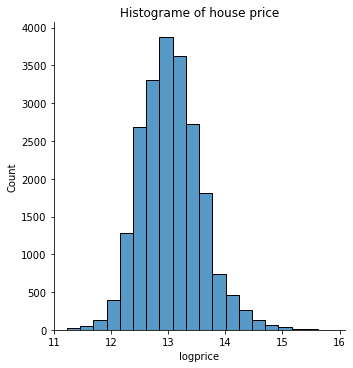

In [56]:
sns.displot(data=housedata, x="logprice", kind="hist", bins=20)
# plot's title
plt.title('Histograme of house price')
# Seaborn is built on top of Matplotlib, so we still need plt.show() to display the plot
plt.show()

Now we want to display the distribution of `logprice` for each level of variable `condition` seperately. Seaborn has a helpful option in this case, `hue` which seperates levels of the categorical variable with different colors. Here similar colors have been used because `condition` is an ordinal/discrete variable.

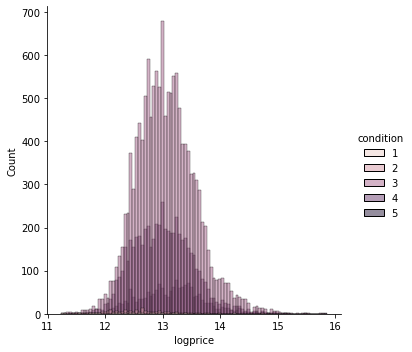

In [11]:
sns.displot(data=housedata, x="logprice", kind="hist", hue="condition")
plt.show()

Change the plot's `kind` to `kde` (kernel distribution estimation) to fit an approximate curve instead of a histogram. Try it with and without `multiple="stack"`.

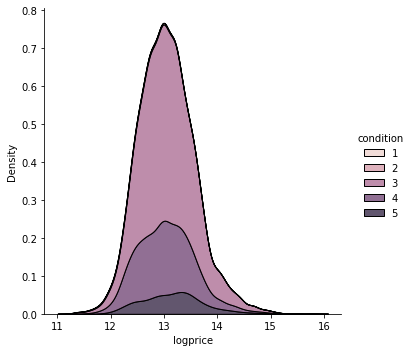

In [24]:
sns.displot(data=housedata, x="logprice", kind="kde", hue="condition", multiple="stack")
plt.show()

A useful feature of sns functions is that they can create figures with multiple subplots. For example, instead of stacking several  distributions for each house `condition` in the same axes, we can “facet” them by plotting each distribution across the columns `col` (or rows `row`) of the figure. Double click on the figure to zoom in.

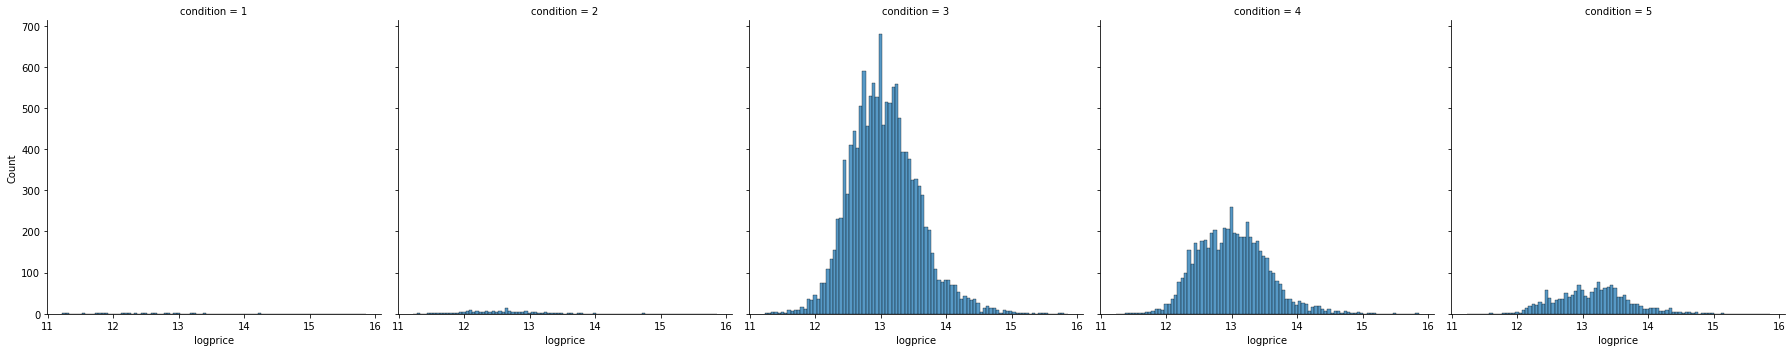

In [13]:
sns.displot(data=housedata, x="logprice", kind="hist", col="condition")
plt.show()

Distribution plots can be used for visualising two variables at once. Assigning a second variable to y, will plot a bivariate distribution to describe the relationship between them. Here we have most of the observations in the darker part of the middle of the plot.

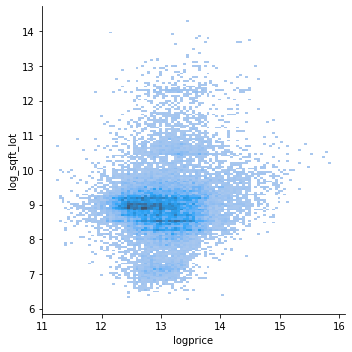

In [14]:
housedata["log_sqft_lot"] = np.log(housedata["sqft_lot"])
sns.displot(data=housedata, x="logprice", y="log_sqft_lot", kind="hist")
plt.show()

### relplot

`relplot` makes scatter plots and line plots. The function has the same structure as `displot`. We need to specify, `x, y, kind`, and there are optional elements like `hue` and `col/row`. Run the cod below and then try it with `style` and `size` instead of `hue`.


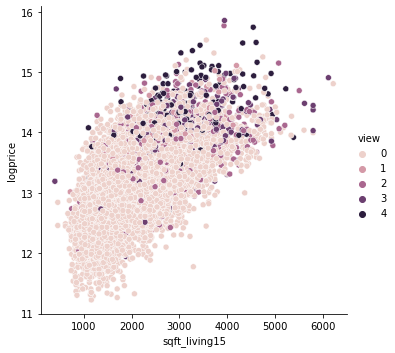

In [28]:
sns.relplot(data=housedata, x="sqft_living15", y="logprice", kind="scatter", hue="view")
plt.show()

A `line` plot is usually a good option to show continuity, for example, when there is a time or data variable in the dataset. For the purpose of ilustration we make a line plot below for price and the number of floors. The blue line shows the mean logprice for each floor number and the shaded area shows 95% confidence intervals.

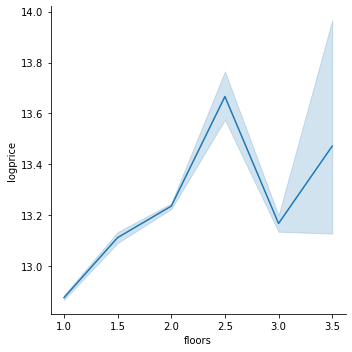

In [16]:
sns.relplot(data=housedata, x="floors", y="logprice", kind="line")
plt.show()

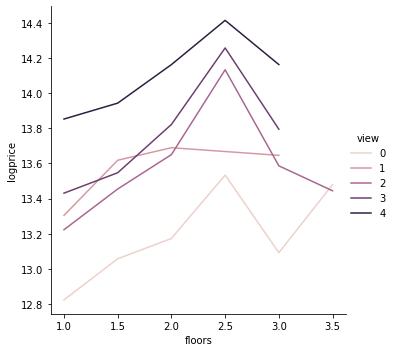

In [17]:
# making seperate lines for each `view`
sns.relplot(data=housedata, x="floors", y="logprice", kind="line", hue="view", ci=None)
plt.show()

### catplo

`catplot` is used for plotting categorical variables. A barplot is a simple way to show count data or frequencies. 

In seaborn you can usually choose different [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for your plots.

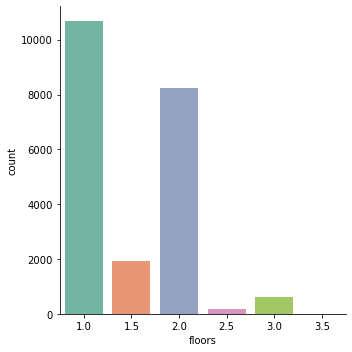

In [18]:
sns.catplot(data=housedata, x="floors", kind="count", palette="Set2")
plt.show()

We can make this plot more advanced by adding a Y variable. Then the length of the bars show the "mean" value of Y for each level/category of X. The small, black bars on top show a confidence interval around mean.

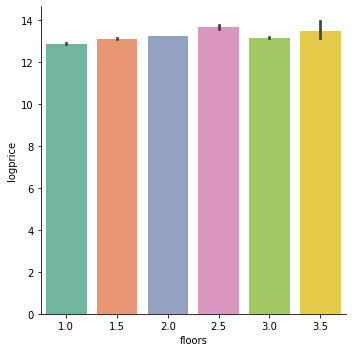

In [19]:
sns.catplot(data=housedata, x="floors", y="logprice", kind="bar", palette="Set2")
plt.show()

We can display more detailed information in such a plot by adding another categorical variable as `hue`. Then  there is a bar plot for each combination of `condition` and `floors`.

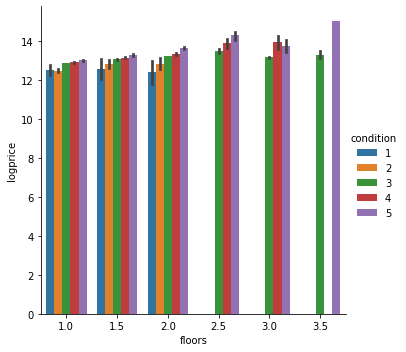

In [20]:
sns.catplot(data=housedata, x="floors", y="logprice", kind="bar", hue="condition")
plt.show()

A boxplot is a great tool for summarising variables as it gives a visual indication of how a variable's mean, median, minimum, maximum and outlier values are spread out (you will learn about boxplots next week- for now let's just learn how to make one). You can make a boxplot using `catplot` by just changing the `kind` option.

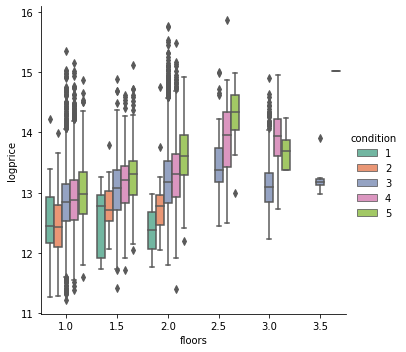

In [43]:
sns.catplot(data=housedata, x="floors", y="logprice", kind="box", hue="condition", palette="Set2")
plt.show()

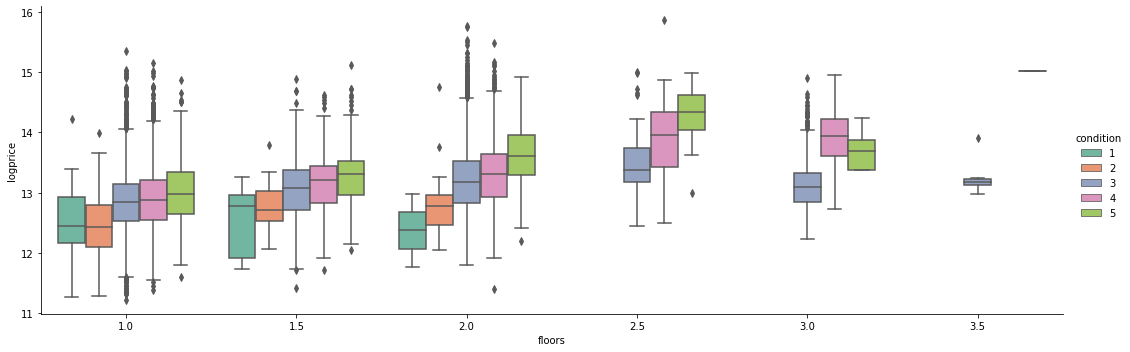

In [52]:
# change the size of the sns figure to make it easier to read
sns.catplot(data=housedata, x="floors", y="logprice", kind="box", hue="condition", palette="Set2",
            height=5, # make the plot 5 units high
            aspect=3) # height should be three times width
plt.show()

Try different `catplot` plots by changing the `kind` option to `violin`, `strip`, `point`.

# Exercises

1. Make a plot with two boxplots that show how `logprice` is distributed for the two levels of `waterfront`. Do houses with a water front veiw have higher prices?

2. Make scatter plots that show house prices, `logprice`, against square footage of the land space, `sqft_lot`, for each `condition` value. Can you say that for higher `sqft_lot` the house prices are higher too? Is the pattern different for each condition?

3. Play around with this dataset and try different types of Seaborn plots. Think about what information each plot presents and what type of plot is better for what variables.